In [1]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

##.........................

from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D

from keras import backend as K

from keras.utils import multi_gpu_model

##..................
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Multiply

#................
import tensorflow as tf

#................
from keras.utils.vis_utils import plot_model

#................
from keras.utils.vis_utils import plot_model

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#   except RuntimeError as e:
#     print(e)

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.preprocessing import image
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import  tensorflow as tf

from numpy.random import randn
from numpy.random import randint


# from libs.spectral_normalized_layers import Dense_SN,Conv2D_SN,Conv2DTranspose_SN

import sys

import numpy as np

## Attention Mechanism
from keras.layers import Layer,Concatenate
from keras.layers import Add
from keras import backend as K
from keras.engine import *
from keras.utils import multi_gpu_model
from keras import backend
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import AveragePooling2D

In [3]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Input

import numpy as np

In [4]:
import glob

In [5]:
def data_gen():
    
#     trainA = "./mapdata/trainer/source/images"
    
    trainA = "./nyu_data/train/target"
    
    trainA_filenames=glob.glob(trainA+str("/*"))
        
#     for i in range(len(trainA_filenames)):
        
#         trainA_filenames[i]=[trainA_filenames[i])]
        
#     print(trainA_filenames)
        
    return trainA_filenames

In [6]:
import cv2

train_data_generator= data_gen()

In [7]:
def show_batch(image_batch, label_batch):
    image_batch = 0.5 *image_batch + 0.5  
    plt.figure(figsize=(30,30))
    for n in range(4):
        ax = plt.subplot(2,2,n+1)
        plt.imshow(image_batch[n,:,:])
        
        plt.axis('off')

764


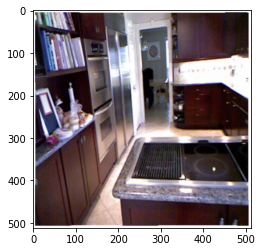

In [8]:
# print(len(train_data_generator))

G=plt.imread(train_data_generator[0])

plt.imshow(G[...,:3])

print(train_data_generator[0][24:-4])

/home/ubuntu/Music/hope/lib/python3.6/site-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


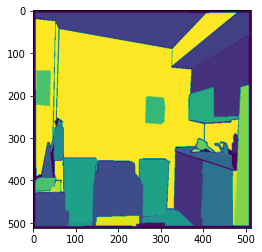

In [9]:
# nyu_rgbd_path = "./labels40.mat"
nyu_rgbd_path = "./nyu_depth_v2_labeled.mat"

from skimage import io
from skimage import color
from skimage import segmentation


# mpimg.imsave("seg_regb.jpg",seg_rgb)

import h5py

from scipy.io import loadmat

# x = loadmat(nyu_rgbd_path)

all_files=h5py.File(nyu_rgbd_path)

image_seg=all_files["labels"][0].transpose(1,0)

# print(image_seg.shape)


# image_seg = all_files[0]

image_seg = cv2.resize(image_seg, (512,512))

plt.imshow(image_seg/895)

# np.max(all_files["labels"])

In [10]:
import math
import cv2

from operator import itemgetter
# select real samples
def generate_real_samples(train_data_gen, n_samples,size=64,patch_shape=16):
    # choose random instances
    
    ix = randint(0, len(train_data_gen), n_samples)
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:

            
            Y=plt.imread(train_data_gen[i])
            
            Y=Y/np.max(Y)
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            all_images_Y.append(Y_k)
            
############################################################################################
            
            X=  all_files["labels"][int(train_data_generator[i][24:-4])-1].transpose(1,0)
                         
                
            X_k=cv2.resize(X, dsize=(2**(j), 2**j))
            
#             X_k=mask2onehot(X_k,41)

            X_k=np.expand_dims(X_k,axis=-1)
    
            X_k=(X_k/894)
            
            all_images.append(X_k)
        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape, 72))
    return all_size_images, y

In [11]:
# def show_batch_masks(image_batch, label_batch):
# #     image_batch = 0.5 *image_batch + 0.5  
#     plt.figure(figsize=(30,30))
#     for n in range(4):
#         ax = plt.subplot(2,2,n+1)
#         image_batches=onehot2mask(image_batch[n])
#         plt.imshow(image_batches,cmap="gray")
        
#         plt.axis('off')

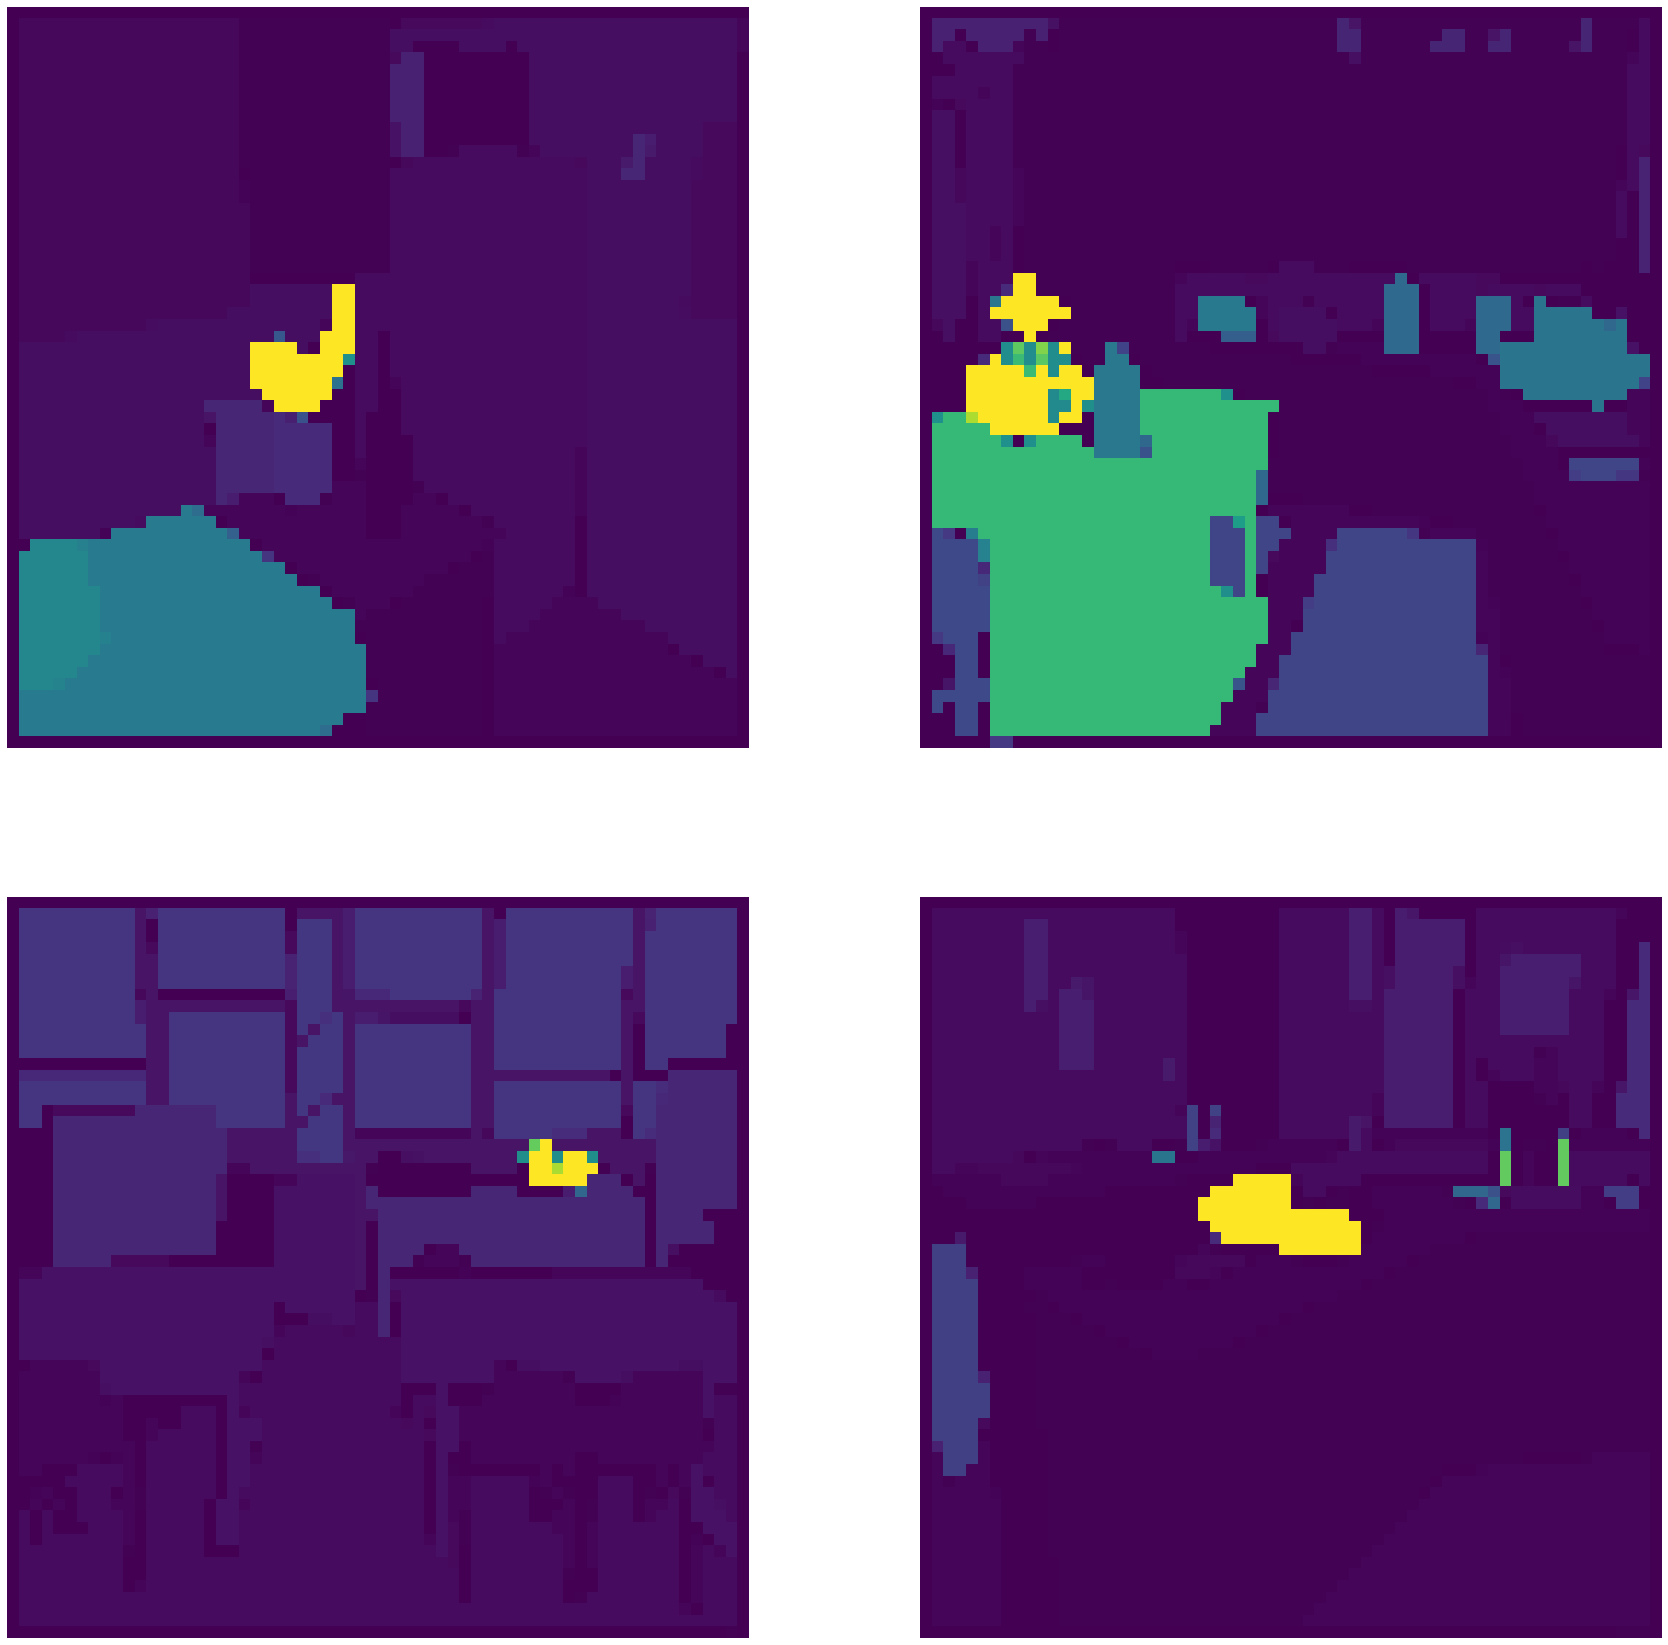

In [12]:
image_batch, label_batch = generate_real_samples(train_data_generator, 4,size=256)


show_batch(image_batch[0][0], label_batch)

# plt.imshow(onehot2mask(image_batch[0][0][0]))

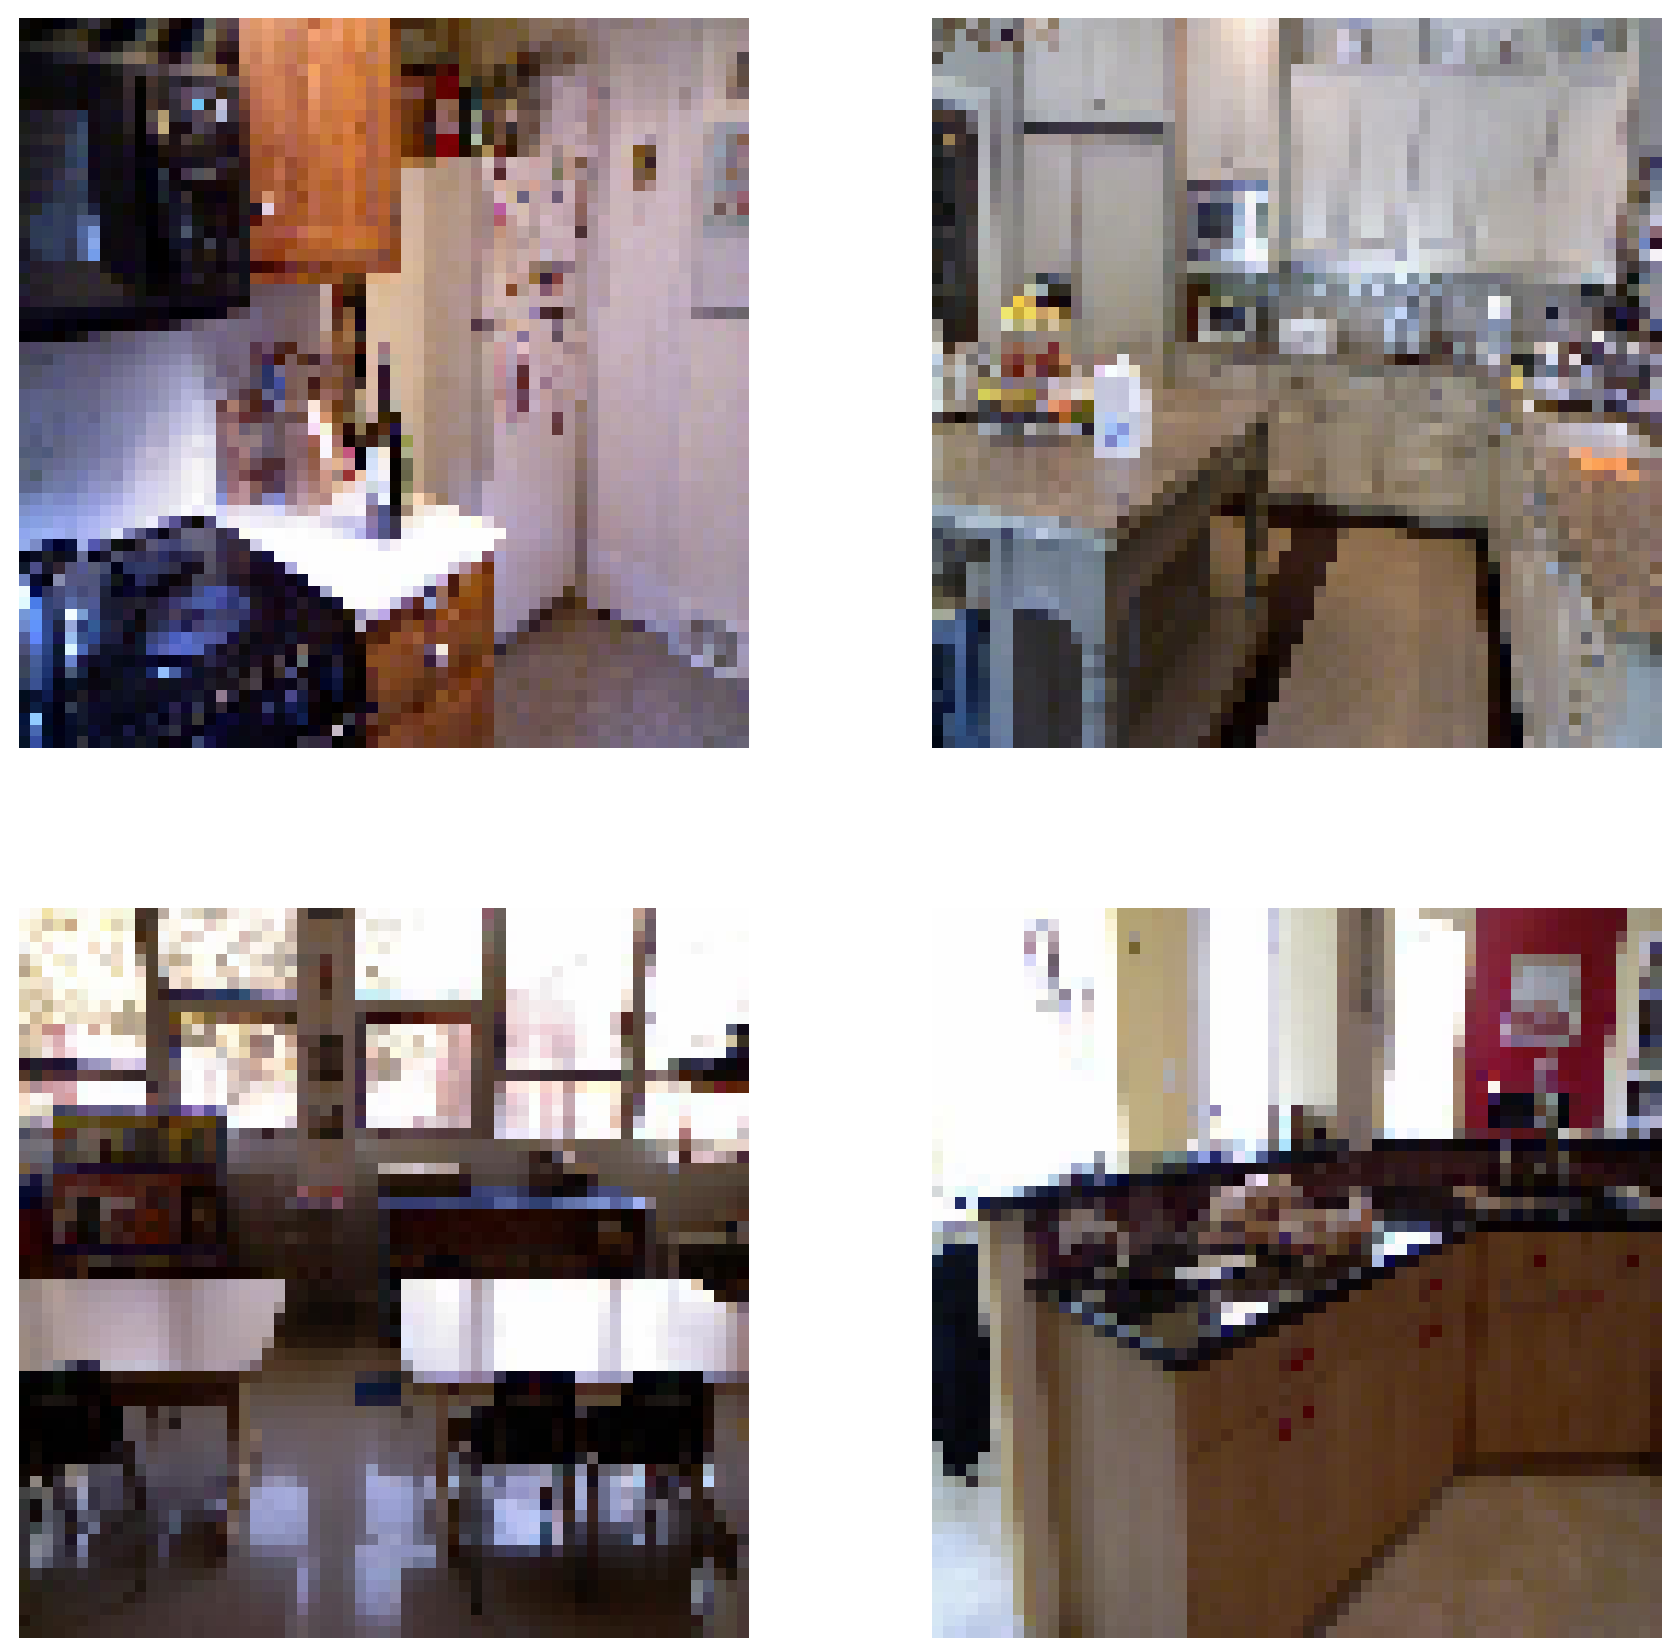

In [13]:
show_batch(image_batch[0][1], label_batch)

In [2]:
show_batch(image_batch[1][0], label_batch) 

NameError: name 'show_batch' is not defined

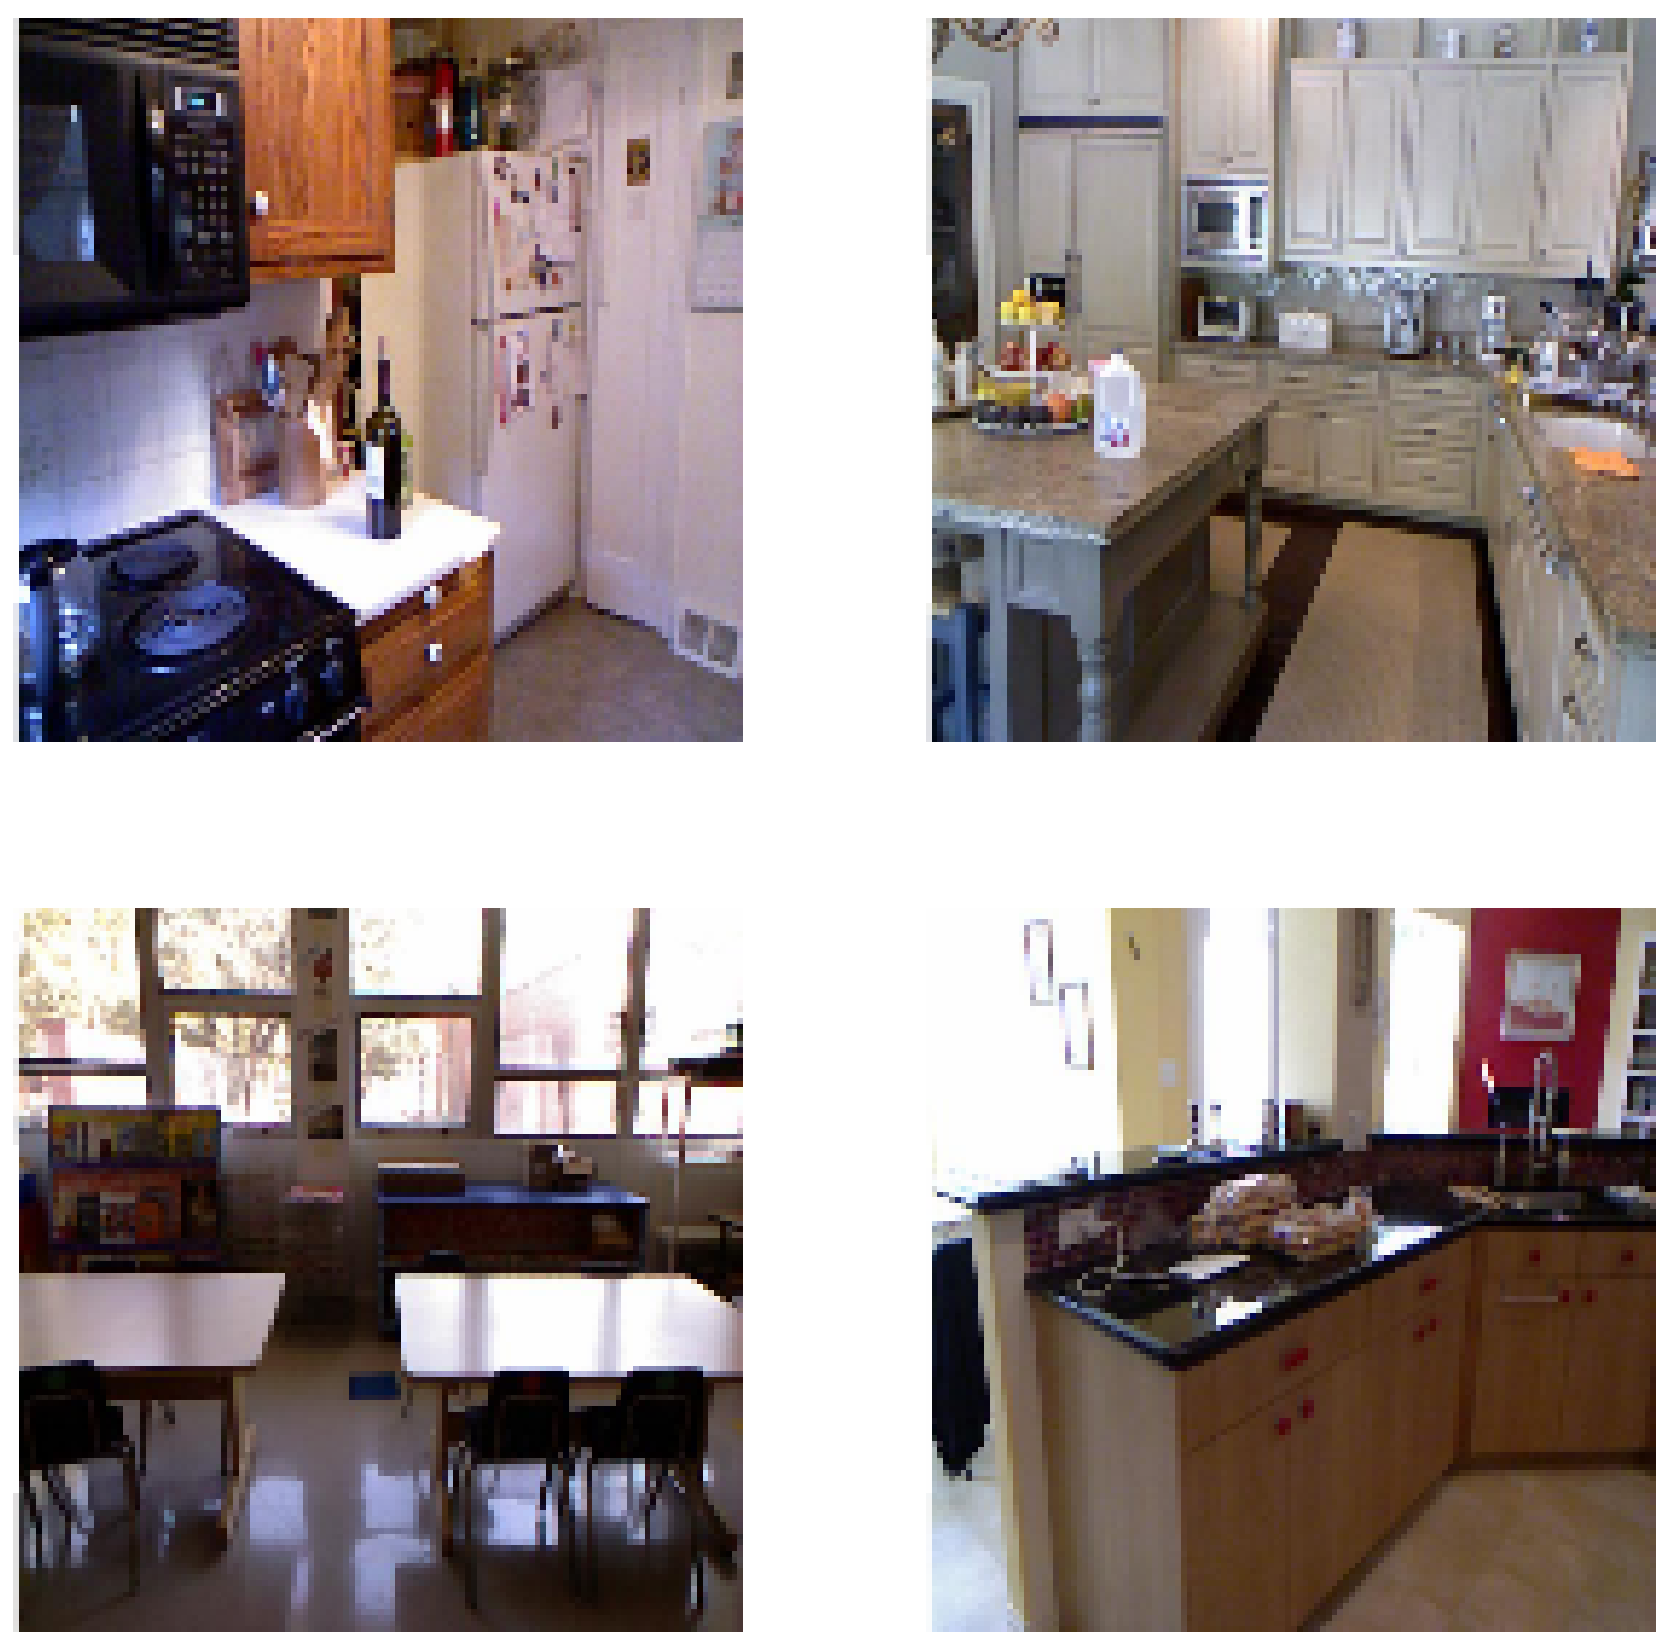

In [15]:
show_batch(image_batch[1][1], label_batch)

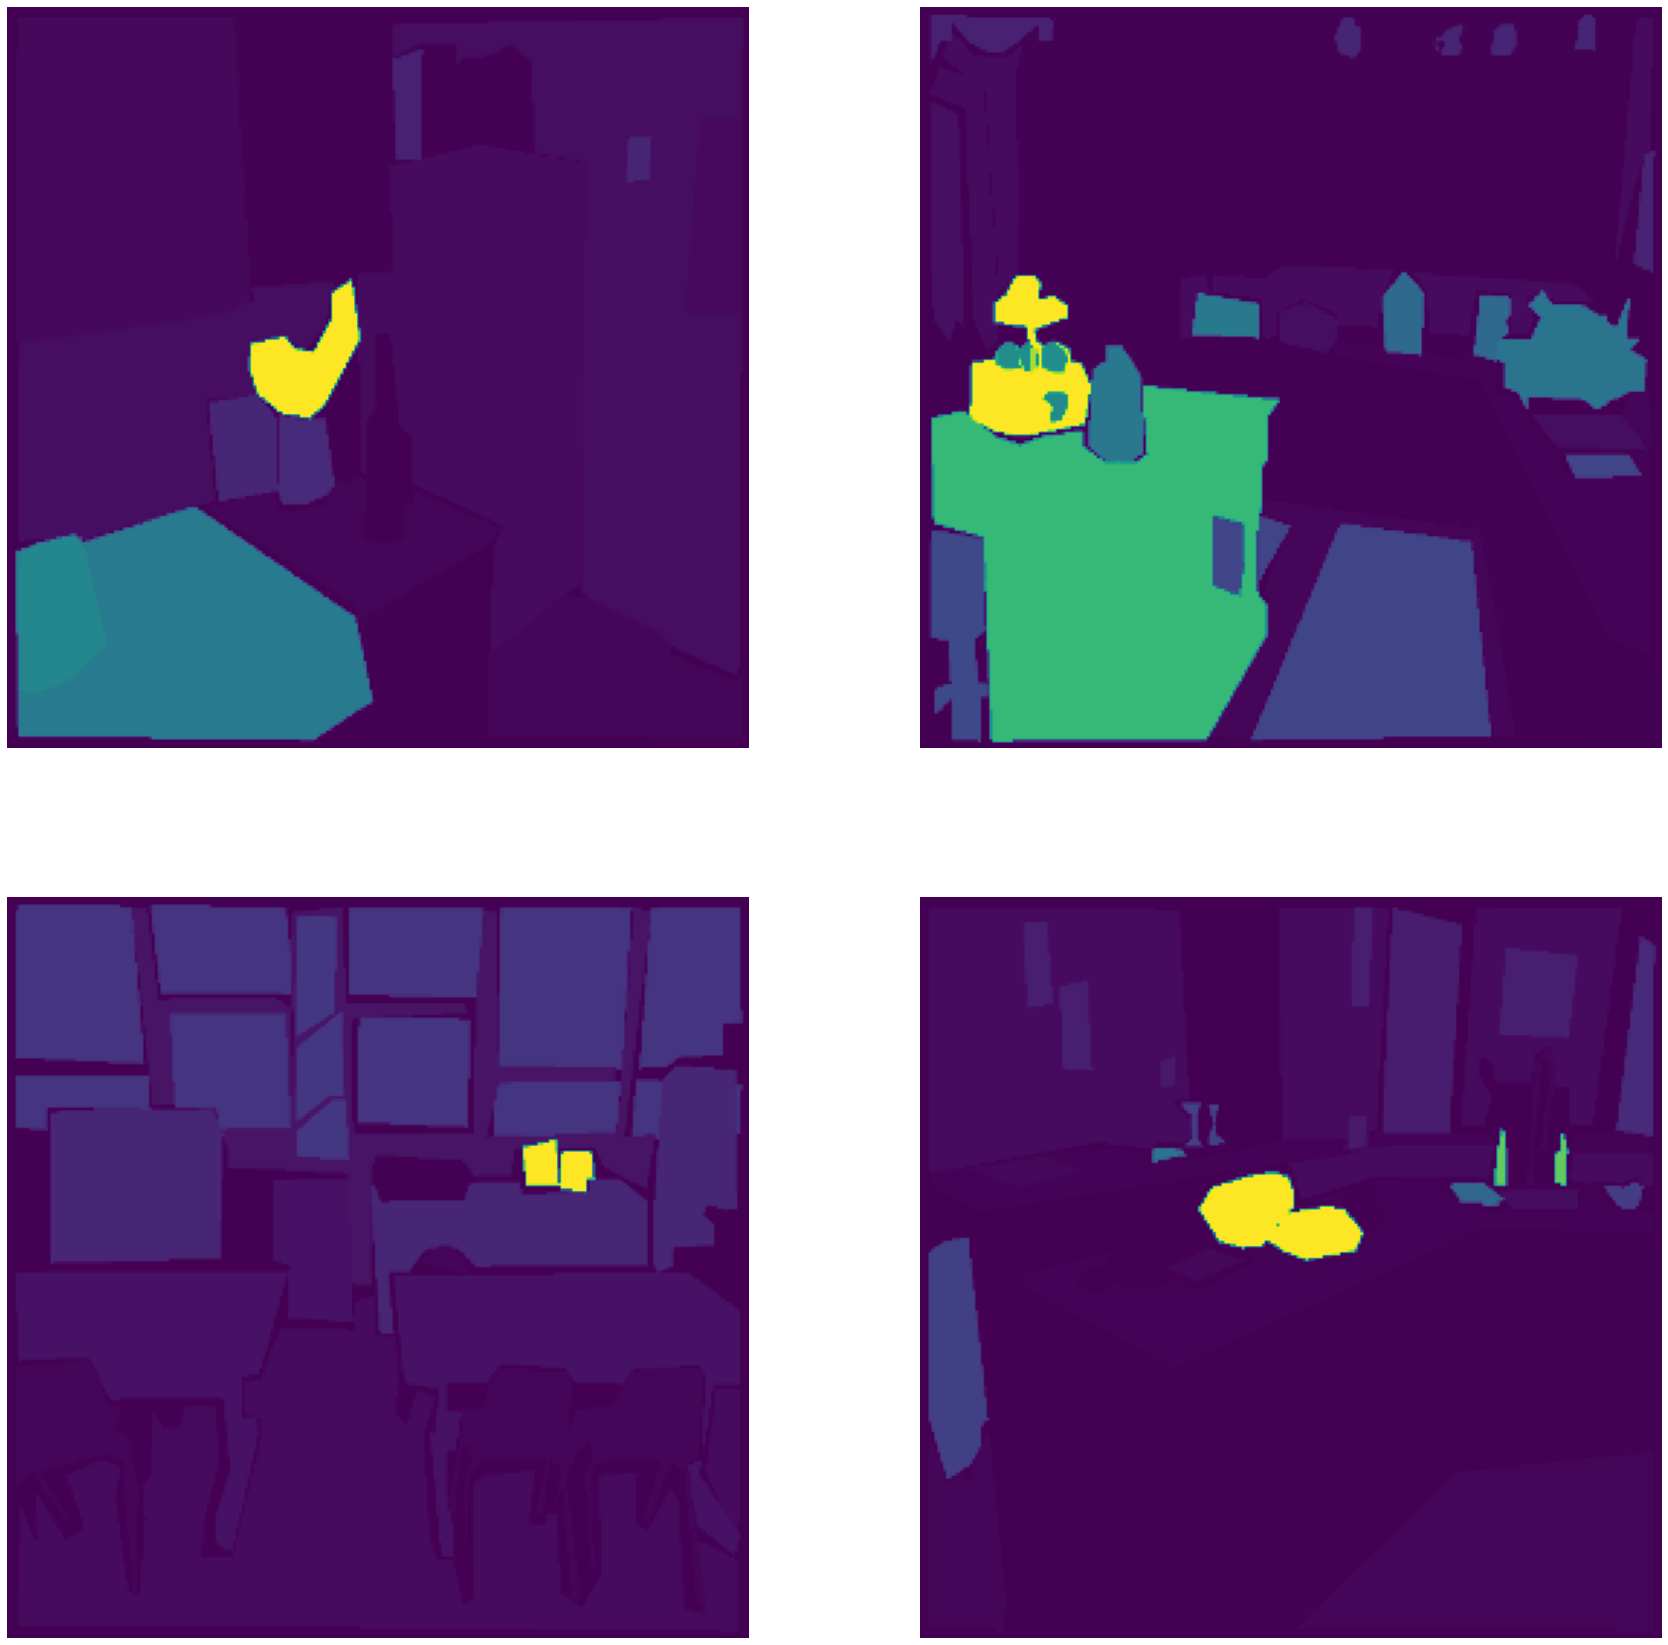

In [16]:
show_batch(image_batch[2][0], label_batch)

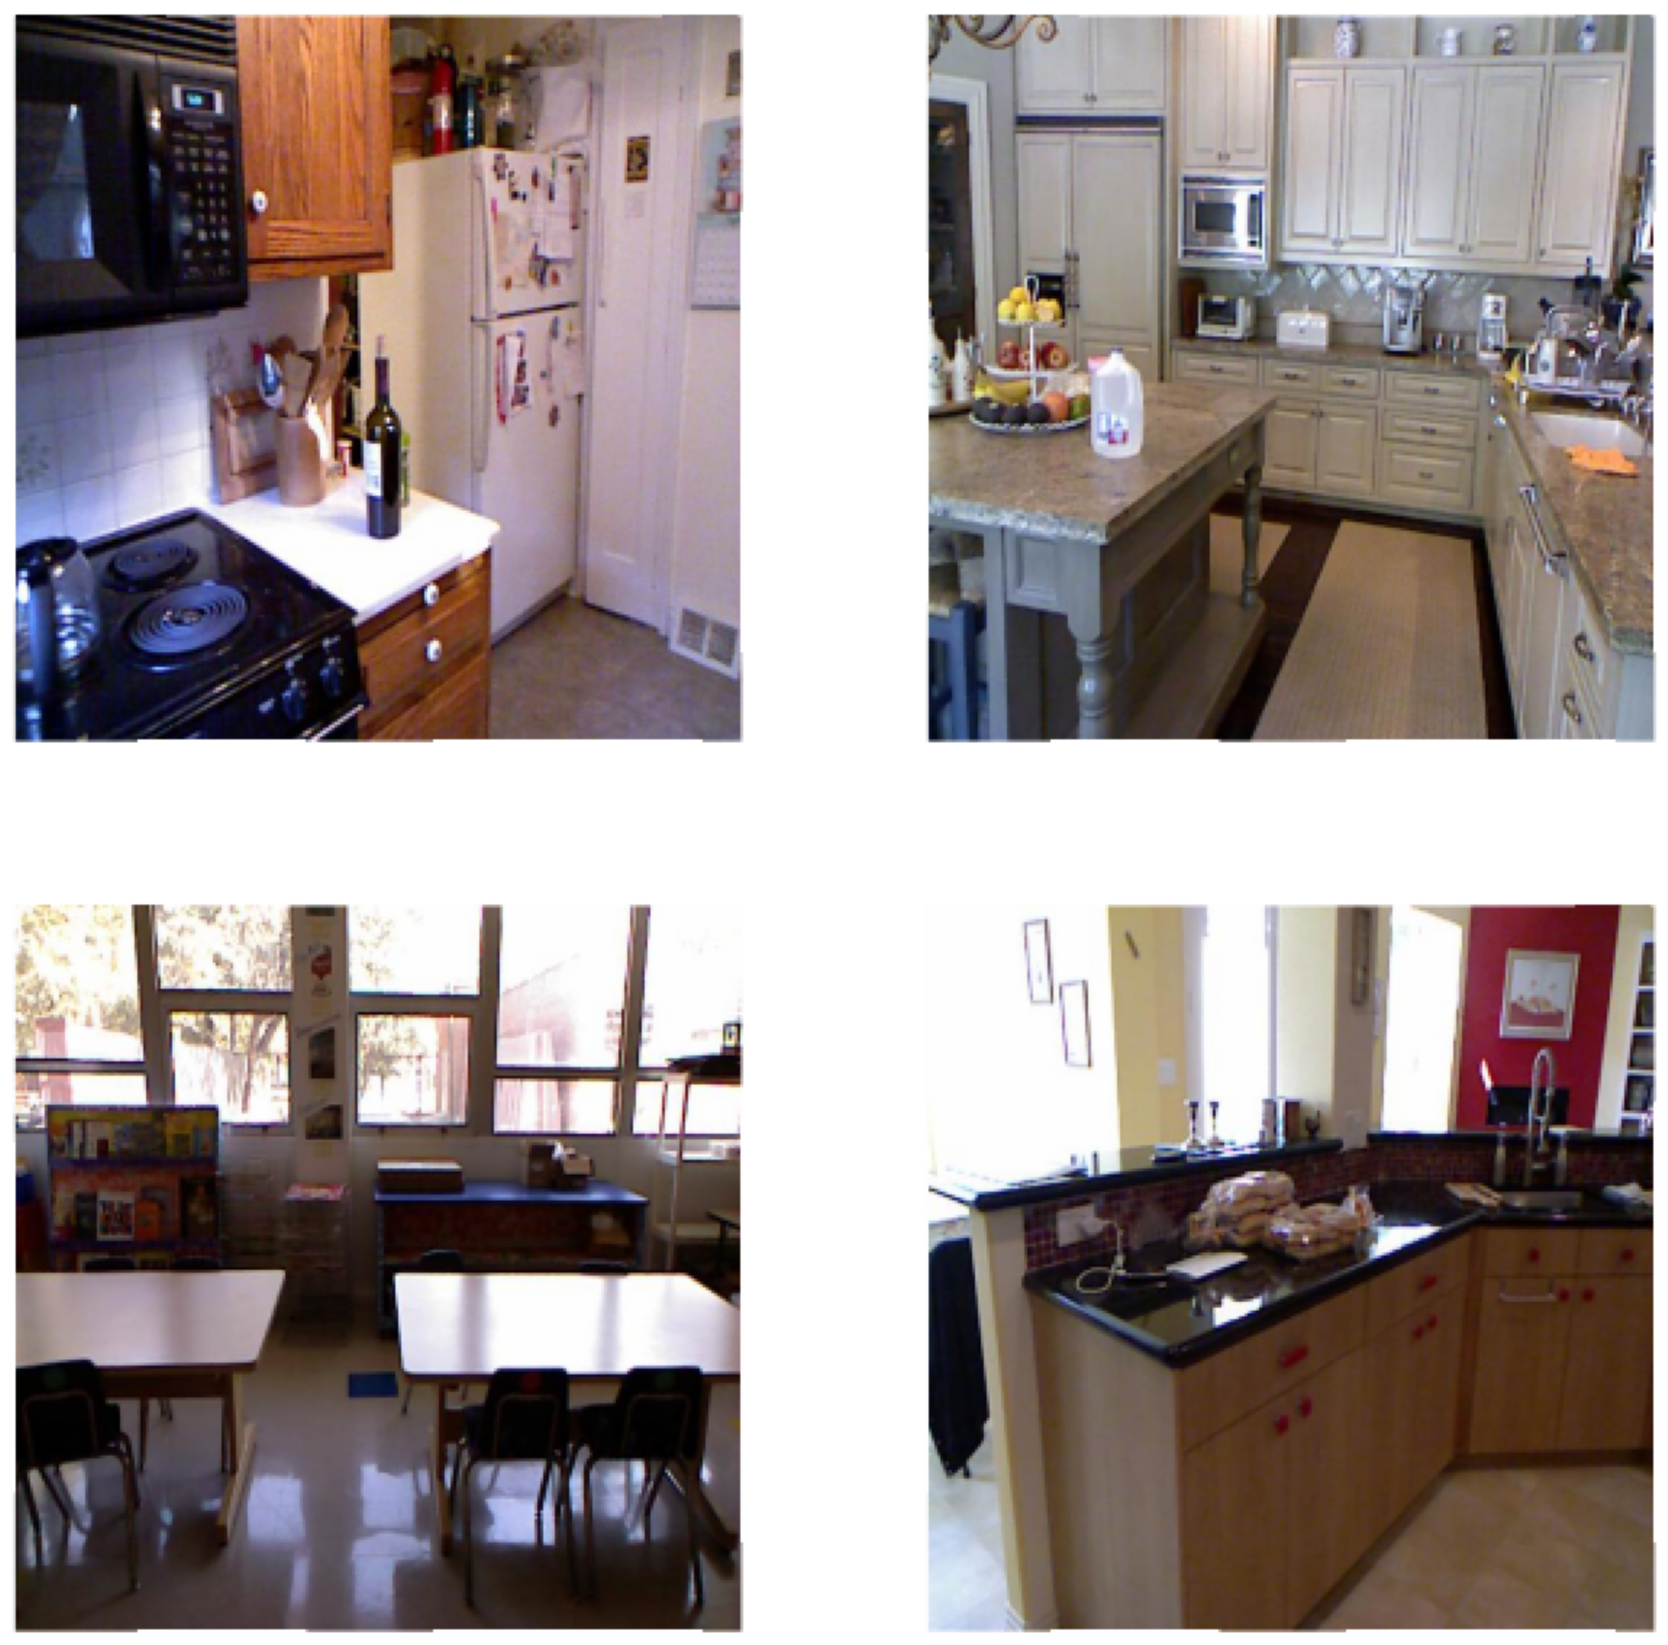

In [17]:
show_batch(image_batch[2][1], label_batch)

In [18]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Input


vgg19_512 = VGG19(include_top=False, weights=None, input_shape=(512,512,3))
vgg19_512.load_weights("./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

vgg19_512.trainable = False

loss_model_512 = Model(inputs=vgg19_512.input, outputs=[vgg19_512.get_layer('block1_conv2').output,vgg19_512.get_layer('block2_conv2').output,vgg19_512.get_layer('block3_conv4').output,vgg19_512.get_layer('block4_conv4').output,vgg19_512.get_layer('block5_conv4').output])
loss_model_512.trainable = False

########################################################################

vgg19_256 = VGG19(include_top=False, weights=None, input_shape=(256,256,3))
vgg19_256.load_weights("./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

vgg19_256.trainable = False

loss_model_256 = Model(inputs=vgg19_256.input, outputs=[vgg19_256.get_layer('block1_conv2').output,vgg19_256.get_layer('block2_conv2').output,vgg19_256.get_layer('block3_conv4').output,vgg19_256.get_layer('block4_conv4').output,vgg19_256.get_layer('block5_conv4').output])
loss_model_256.trainable = False

##########################################################

vgg19_128 = VGG19(include_top=False, weights=None, input_shape=(128,128,3))
vgg19_128.load_weights("./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

vgg19_128.trainable = False

loss_model_128 = Model(inputs=vgg19_128.input, outputs=[vgg19_128.get_layer('block1_conv2').output,vgg19_128.get_layer('block2_conv2').output,vgg19_128.get_layer('block3_conv4').output,vgg19_128.get_layer('block4_conv4').output,vgg19_128.get_layer('block5_conv4').output])
loss_model_128.trainable = False
############################################################

vgg19_64 = VGG19(include_top=False, weights=None, input_shape=(64,64,3))
vgg19_64.load_weights("./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

vgg19_64.trainable = False

loss_model_64 = Model(inputs=vgg19_64.input, outputs=[vgg19_64.get_layer('block1_conv2').output,vgg19_64.get_layer('block2_conv2').output,vgg19_64.get_layer('block3_conv4').output,vgg19_64.get_layer('block4_conv4').output,vgg19_64.get_layer('block5_conv4').output])
loss_model_64.trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [19]:
def build_discriminator(shape=512,
                        ndf=64, n_layers=3,
                        kernel_size=4, strides=2, activation='linear',
                        n_downsampling=1):
    
    img_a_input_512 = Input(shape=(512,512,1))
    img_b_input_512 = Input(shape=(512,512,3))

    img_a_input_256 = Input(shape=(256,256,1))
    img_b_input_256 = Input(shape=(256,256,3))


    img_a_input_128 = Input(shape=(128,128,1))
    img_b_input_128 = Input(shape=(128,128,3))

    img_a_input_64 = Input(shape=(64,64,1))
    img_b_input_64 = Input(shape=(64,64,3))
    
    if shape==512:
        input_a=img_a_input_512
        input_b=img_b_input_512
        
    
    if shape==256:
        input_a=img_a_input_256
        input_b=img_b_input_256
        
    
    if shape==128:
        input_a=img_a_input_128
        input_b=img_b_input_128
        
    
    if shape==64:
        input_a=img_a_input_64
        input_b=img_b_input_64

    features = []
    x = Concatenate(axis=-1)([input_a, input_b])
    for i in range(n_downsampling):
        x = AveragePooling2D(3, strides=2, padding='same')(x)

    x = Conv2D(ndf, kernel_size=kernel_size, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    features.append(x)

    nf = ndf
    for i in range(1, n_layers):
        nf = min(ndf * 2, 512)
        x = Conv2D(nf, kernel_size=kernel_size, strides=2, padding='same')(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.2)(x)
        features.append(x)

    nf = min(nf * 2, 512)
    x = Conv2D(nf, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    features.append(x)

    x = Conv2D(1, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = Activation(activation)(x)

    # create model graph
    model = Model(inputs=[img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, input_b], outputs=[x] + features)
    print("\nDiscriminator")
    model.summary()
    return model



In [20]:
discriminator_0=build_discriminator(shape=512,n_downsampling=0)

discriminator_1=build_discriminator(shape=256,n_downsampling=0)

discriminator_2=build_discriminator(shape=128,n_downsampling=0)

discriminator_3=build_discriminator(shape=64,n_downsampling=0)


Discriminator
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 512, 512, 4)  0           input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 4160        concatenate_


Discriminator
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 64, 64, 4)    0           input_35[0][0]                   
                                                                 input_36[0][0]                   
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 64)   4160        concatenate_

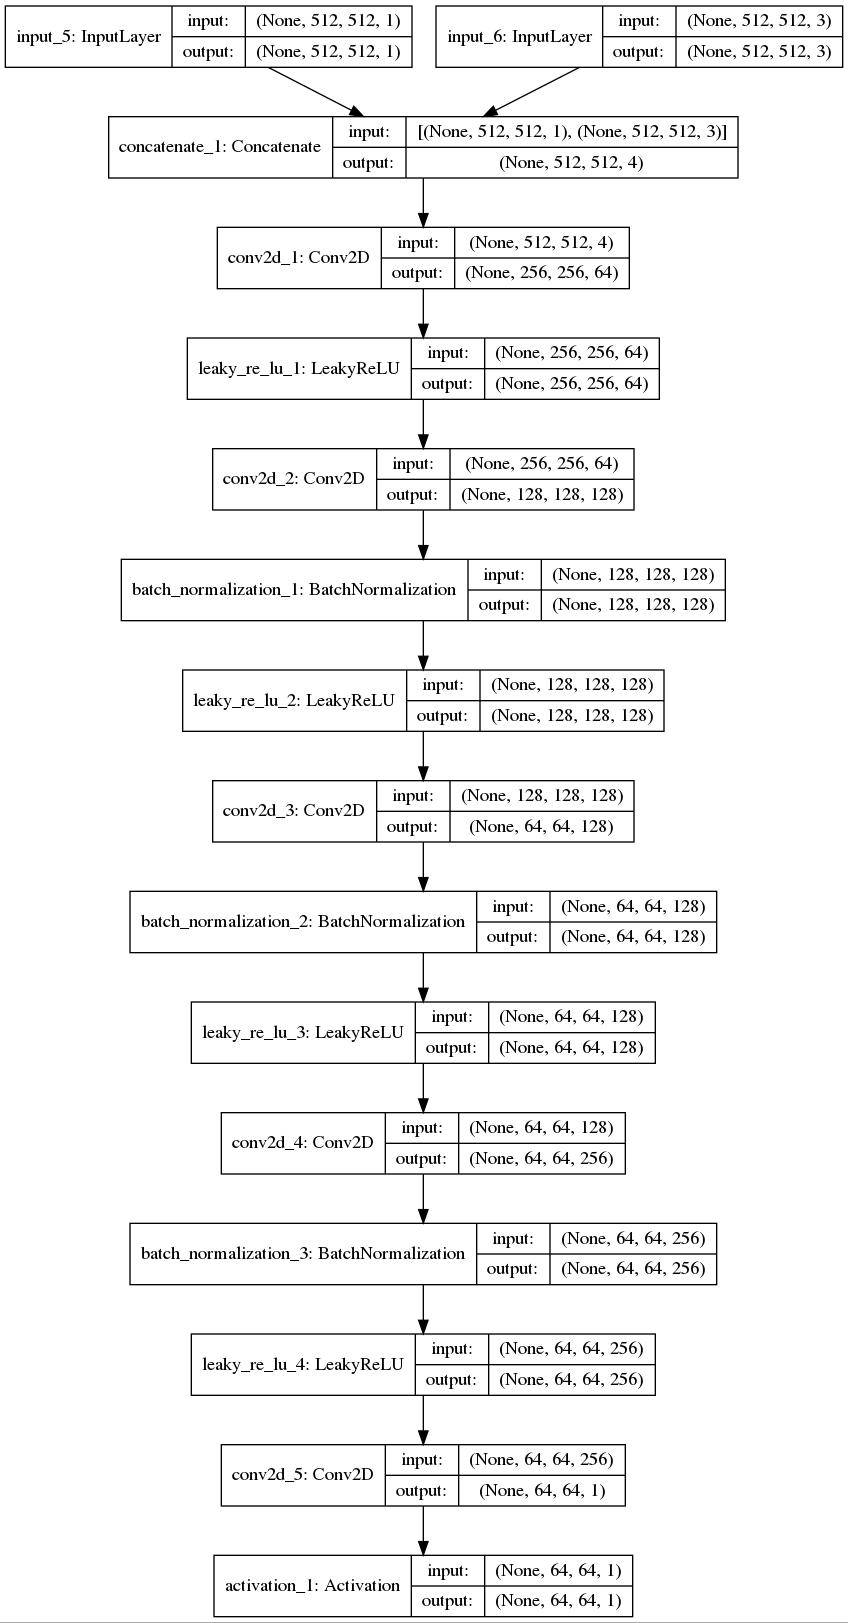

In [21]:
plot_model(discriminator_0, show_shapes=True, show_layer_names=True,to_file="discriminator_512.jpg")

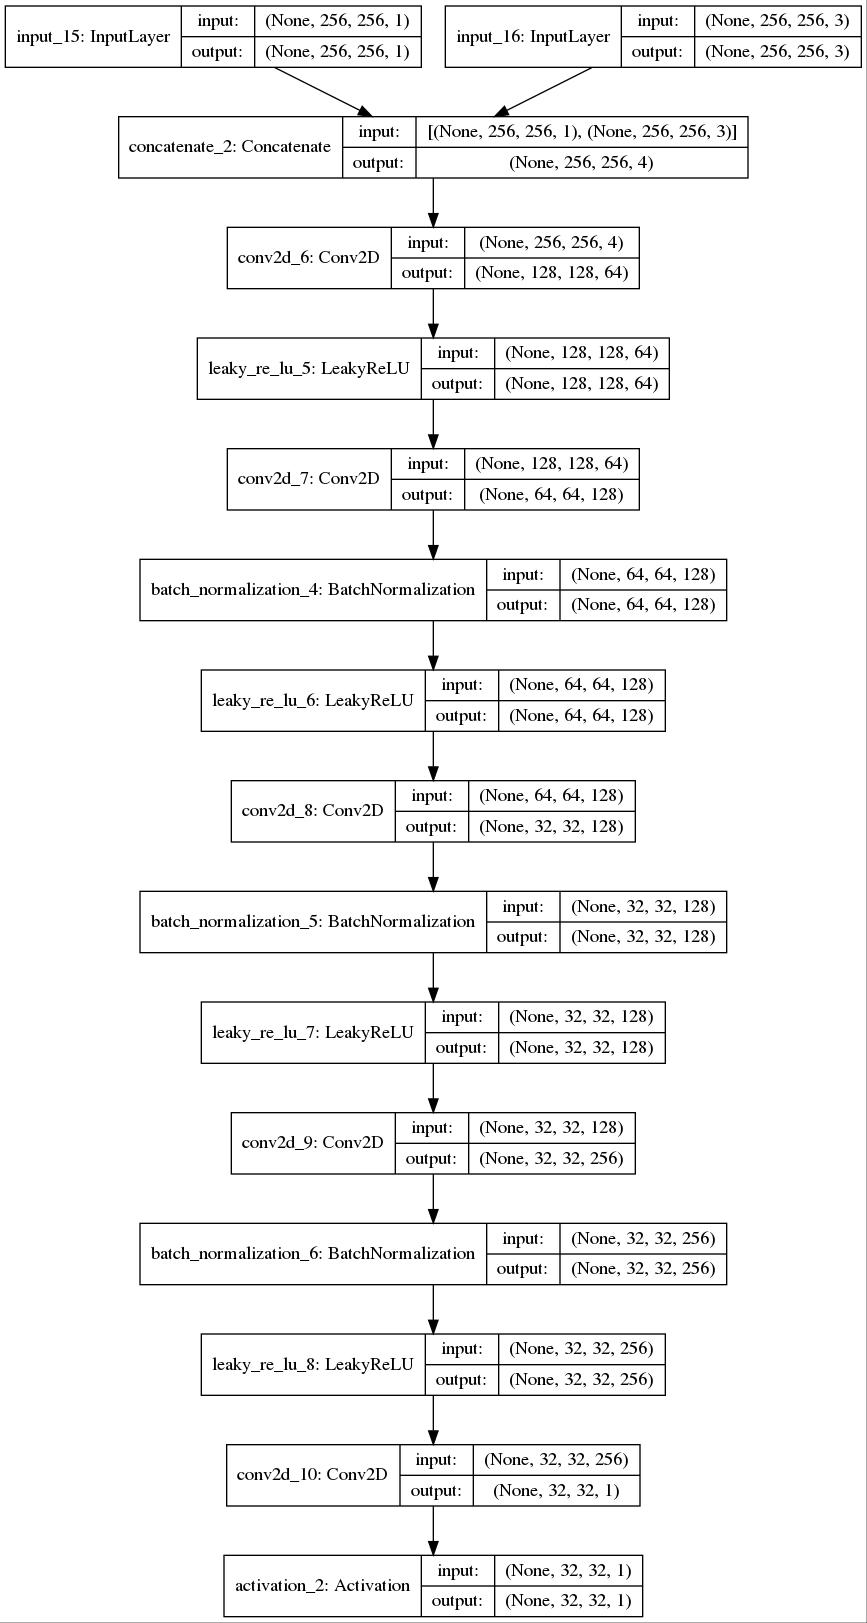

In [22]:
plot_model(discriminator_1, show_shapes=True, show_layer_names=True,to_file="discriminator_256.jpg")

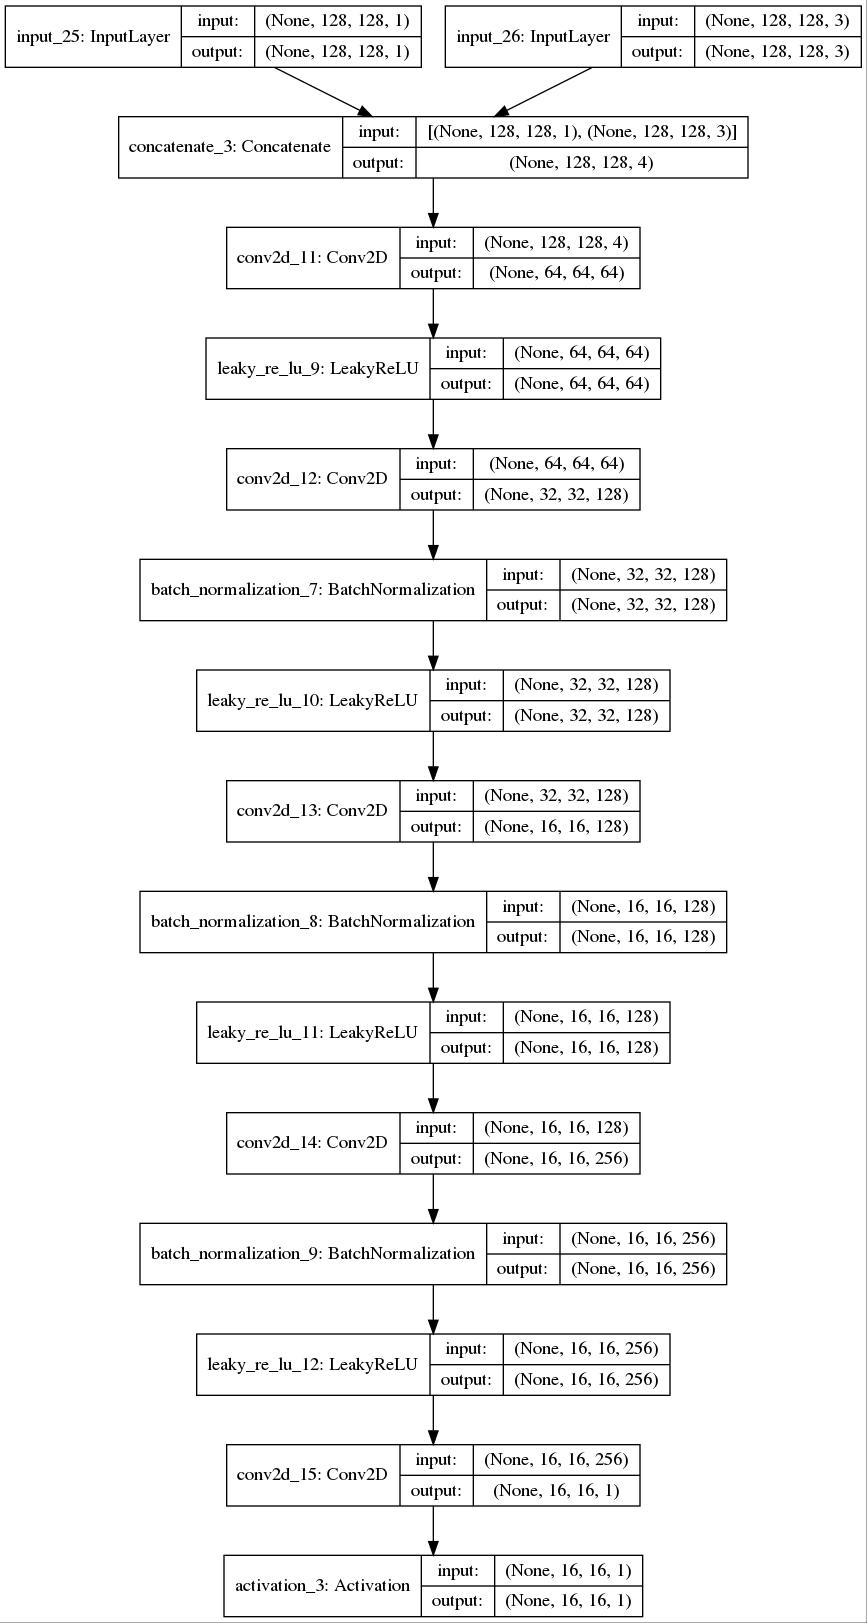

In [23]:
plot_model(discriminator_2, show_shapes=True, show_layer_names=True,to_file="discriminator_128.jpg")

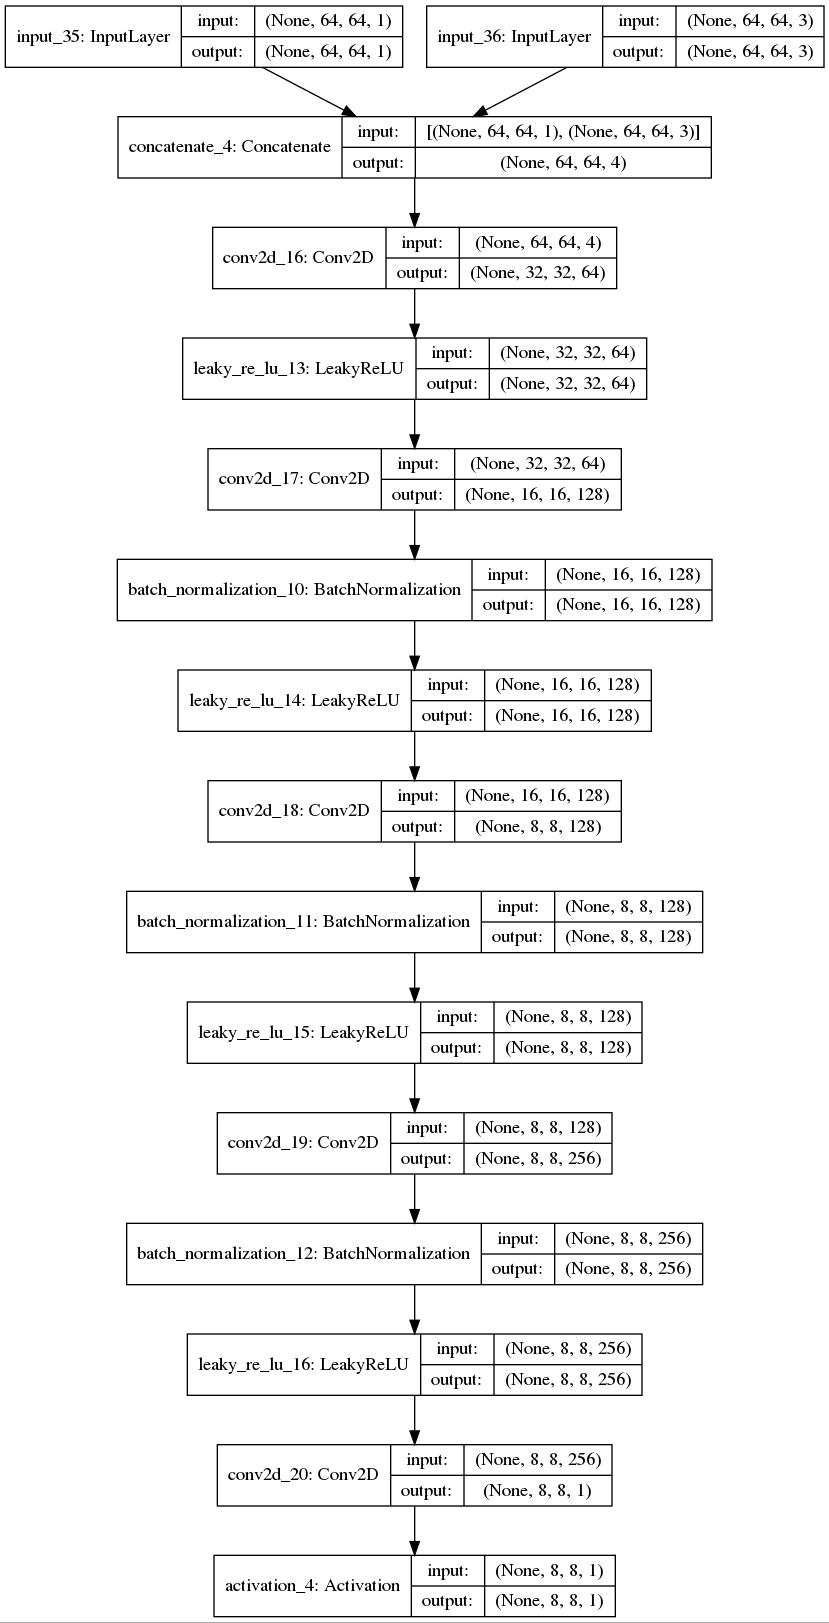

In [24]:
plot_model(discriminator_3, show_shapes=True, show_layer_names=True,to_file="discriminator_64.jpg")

In [25]:
# define an normal encoder block
def define_normal_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def normal_decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2D(n_filters, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g


# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g





# define the standalone generator model
def define_generator_1024(image_shape=(1024,1024,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
    
#.........................................512..........................

	image_shape_512 = (int(image_shape[0]/2),int(image_shape[1]/2),int(image_shape[2]))
    
	in_image_512 = Input(shape=image_shape_512) 
    
# #.................................

# 	e512_special = define_normal_encoder_block(in_image_512, 16)
#...........................
    #concatenate
        
	e_512_1=define_normal_encoder_block(in_image_512, 32)
	e_512_middle=define_normal_encoder_block(e_512_1,32)
	e_512_2=define_encoder_block(e_512_middle,32)   


#.........................................256..........................

	image_shape_256 = (int(image_shape[0]/4),int(image_shape[1]/4),int(image_shape[2]))
    
	in_image_256 = Input(shape=image_shape_256)
    
	e256_special = define_normal_encoder_block(in_image_256, 32)
    
# #...........................
#     #concatenate
    
	concatenate_512_256 = Concatenate()([e256_special,e_512_2])   
    
	e_256_1=define_normal_encoder_block(concatenate_512_256, 64)
	e_256_middle = define_normal_encoder_block(e_256_1,64)
	e_256_2=define_encoder_block(e_256_middle,64)  
    

    

#.............................................128...............
	image_shape_128 = (int(image_shape[0]/8),int(image_shape[1]/8),int(image_shape[2]))
    
	in_image_128 = Input(shape=image_shape_128)
    
	e128_special = define_normal_encoder_block(in_image_128, 64)
    
	concatenate_256_128 = Concatenate()([e128_special,e_256_2]) 

    
	e_128_1=define_normal_encoder_block(concatenate_256_128, 128)
	e_128_middle=define_normal_encoder_block(e_128_1, 128)
	e_128_2=define_encoder_block(e_128_middle,128)

    
#..............................................64..................
	image_shape_64 =(int(image_shape[0]/16),int(image_shape[1]/16),int(image_shape[2]))

	# image input
	in_image_64 = Input(shape=image_shape_64)
	# encoder model
	e1 = define_normal_encoder_block(in_image_64, 128, batchnorm=False)
#...........................
    #concatenate
    
	concatenate_128_64 = Concatenate()([e1,e_128_2])

#.............................
    
	e2 = define_normal_encoder_block(concatenate_128_64, 256)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 256, dropout=False)
 
	d7 = normal_decoder_block(d6, e1, 128, dropout=False)
# 	d_attention_128=Attention(256)(d7)
    
##....................64 output
	# output
	g = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
    
##...............................128 output

	d8 = decoder_block(d7, e_128_middle, 128, dropout=False)
	d9 = normal_decoder_block(d8, e_128_1, 128, dropout=False)
	d10 = normal_decoder_block(d9, e128_special, 64, dropout=False)
	# output
	# output

	g_128 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d10)
	out_image_128 = Activation('tanh')(g_128)
    
# ##...............................256 output

	d11 = decoder_block(d10, e_256_middle, 64, dropout=False)
# 	d_attention_256=Attention(128)(d11)
	d12 = normal_decoder_block(d11, e_256_1, 64, dropout=False)
# 	# output
	g_256 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d12)
	out_image_256 = Activation('tanh')(g_256)
    
####....................................512 output

	d13 = decoder_block(d12, e_512_middle, 32, dropout=False)
# 	d_attention_512=Attention(64)(d13)
	d14 = normal_decoder_block(d13, e_512_1, 32, dropout=False)
# 	# output
	g_512 = Conv2D(3, (4,4), strides=(1,1), padding='same', kernel_initializer=init)(d14)
	out_image_512 = Activation('tanh')(g_512)
    
	# define model
	model = Model([in_image_512,in_image_256,in_image_128,in_image_64], [out_image_512,out_image_256,out_image_128,out_image])
# 	model = multi_gpu_model(model, gpus=2)
	return model

In [26]:
g_model = define_generator_1024(image_shape=(1024,1024,1))

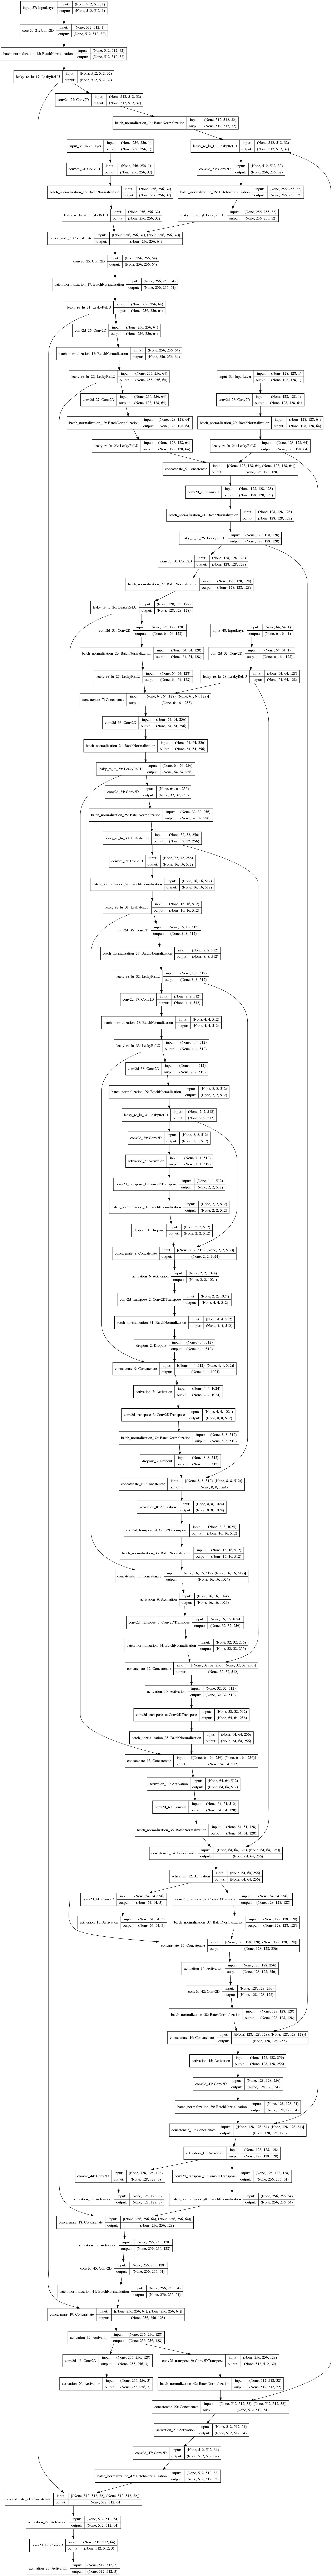

In [27]:
plot_model(g_model, show_shapes=True, show_layer_names=True,to_file="g_model_512.jpg")

In [28]:
img_a_input_512 = Input(shape=(512,512,1))
img_b_input_512 = Input(shape=(512,512,3))

img_a_input_256 = Input(shape=(256,256,1))
img_b_input_256 = Input(shape=(256,256,3))


img_a_input_128 = Input(shape=(128,128,1))
img_b_input_128 = Input(shape=(128,128,3))

img_a_input_64 = Input(shape=(64,64,1))
img_b_input_64 = Input(shape=(64,64,3))



In [29]:
fake_samples = g_model([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64])


D_real_0 = discriminator_0([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64 ,img_b_input_512])
D_fake_0 = discriminator_0([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, fake_samples[0]])



In [30]:
D_real_1 = discriminator_1([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64 ,img_b_input_256])
D_fake_1 = discriminator_1([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, fake_samples[1]])

In [31]:
D_real_2 = discriminator_2([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64 ,img_b_input_128])
D_fake_2 = discriminator_2([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, fake_samples[2]])

In [32]:
D_real_3 = discriminator_3([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64 ,img_b_input_64])
D_fake_3 = discriminator_3([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, fake_samples[3]])

In [33]:
# define D graph and optimizer
g_model.trainable = False
discriminator_0.trainable = True
discriminator_1.trainable = True
discriminator_2.trainable = True
discriminator_3.trainable = True


D0_model = Model([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_512], [D_real_0[0], D_fake_0[0]],name='Discriminator0_model')
D1_model = Model([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_256], [D_real_1[0], D_fake_1[0]],
                 name='Discriminator1_model')
D2_model = Model([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_128], [D_real_2[0], D_fake_2[0]],
                 name='Discriminator2_model')
D3_model = Model([img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_64], [D_real_3[0], D_fake_3[0]],
                 name='Discriminator3_model')


D0_model.compile(optimizer=Adam(2e-4, beta_1=0.5, beta_2=0.999),
                 loss=['mse', 'mse'],loss_weights=[3,3])
D1_model.compile(optimizer=Adam(2e-4, beta_1=0.5, beta_2=0.999),
                 loss=['mse', 'mse'],loss_weights=[3,3])
D2_model.compile(optimizer=Adam(2e-4, beta_1=0.5, beta_2=0.999),
                 loss=['mse', 'mse'],loss_weights=[3,3])
D3_model.compile(optimizer=Adam(2e-4, beta_1=0.5, beta_2=0.999),
                 loss=['mse', 'mse'],loss_weights=[3,3])

In [34]:
# plot_model(D_real, show_shapes=True, show_layer_names=True,to_file="g_model_512.jpg")

def loss_feature_matching(y_true,fake_samples,sample_weight, img_a_input ,real_samples, D, loss_model,feature_matching_weight=30,name="1024"):


    loss_feat_match = 0
    
        # get the discriminator intermediate outputs from fake and real data
    f_fake = D([img_a_input[0],img_a_input[1],img_a_input[2],img_a_input[3], fake_samples])[1:]
    f_real = D([img_a_input[0],img_a_input[1],img_a_input[2],img_a_input[3], real_samples])[1:]
    
    fake_vgg=loss_model(fake_samples)
    real_vgg=loss_model(real_samples)

    # sum the per layer average absolute distance 
    for i in range(len(f_fake)):
        loss_feat_match += K.mean(K.abs(f_real[i] - f_fake[i]))
        
#     vgg_weights=[(1/16.0),(1/8.0),(1/4.0),(1/2.0),1]
    
    vgg_loss=0
    
    for j in range(len(fake_vgg)):
        vgg_loss += 0.6*K.mean(K.abs(fake_vgg[j] - real_vgg[j]))
        
    mse_loss=K.mean(K.abs(real_samples-fake_samples))
    
#     print(K.mean(K.square(real_samples)))

    printer=K.print_tensor(mse_loss,message="mae_loss "+name)

    # scale the loss
    loss_feat_match *= feature_matching_weight
#     return loss_feat_match+vgg_loss+mse_loss+0*printer
    return loss_feat_match+0*printer+vgg_loss

In [35]:
# g_model.trainable = False
# discriminator.trainable = True

# D_model = Model(inputs=[img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_512,img_b_input_256,img_b_input_128,img_b_input_64],
#                     outputs=[D_real[0], D_fake[0]])
# D_model.compile(optimizer=Adam(2e-4, beta_1=0.5, beta_2=0.999),loss=["mse","mse"])

In [36]:
from functools import partial

img_a_input=[img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64]

# img_b_input=[img_b_input_512,img_b_input_256,img_b_input_128,img_b_input_64]


loss_fm0 = partial(loss_feature_matching,img_a_input=img_a_input,
                   real_samples=img_b_input_512,  D=discriminator_0,loss_model=loss_model_512,
                   feature_matching_weight=25,name="512")

loss_fm1 = partial(loss_feature_matching,img_a_input=img_a_input,
                   real_samples=img_b_input_256,  D=discriminator_1,loss_model=loss_model_256,
                   feature_matching_weight=25,name="256")

loss_fm2 = partial(loss_feature_matching,img_a_input=img_a_input,
                   real_samples=img_b_input_128,  D=discriminator_2,loss_model=loss_model_128,
                   feature_matching_weight=25,name="128")

loss_fm3 = partial(loss_feature_matching,img_a_input=img_a_input,
                   real_samples=img_b_input_64,  D=discriminator_3,loss_model=loss_model_64,
                   feature_matching_weight=25,name="64")

In [37]:
g_model.trainable = True
discriminator_0.trainable = False
discriminator_1.trainable = False
discriminator_2.trainable = False
discriminator_3.trainable = False

# print(type(fake_samples))

G_model = Model(inputs=[img_a_input_512,img_a_input_256,img_a_input_128,img_a_input_64, img_b_input_512,img_b_input_256,img_b_input_128,img_b_input_64],
                outputs=[D_fake_0[0],D_fake_1[0],D_fake_2[0],D_fake_3[0],fake_samples[0],fake_samples[1],fake_samples[2],fake_samples[3]])
G_model.compile(Adam(lr=2e-4, beta_1=0.5, beta_2=0.999),
                loss=['mse','mse','mse','mse', loss_fm0,loss_fm1,loss_fm2,loss_fm3],loss_weights=[3,3,3,3,1,1,1,1])

In [38]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
# 	print(len(samples))    
	# create 'fake' class labels (0)
	y = zeros((len(samples), patch_shape, patch_shape*2,1))
	return X, y

In [39]:
import os
from matplotlib import image as mpimg

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
		# select a batch of real samples
	X_real_all , y_real = generate_real_samples(dataset, n_samples,  size=512,patch_shape=16)
        
##################################################################################


	X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

	X_realA_512,X_realB_512 = tuple(X_real_512)
	X_realA_256,X_realB_256 = tuple(X_real_256)
	X_realA_128,X_realB_128 = tuple(X_real_128)
	X_realA_64,X_realB_64 = tuple(X_real_64)
    
# 	# generate a batch of fake samples
	X_fake, y_fake = generate_fake_samples(g_model, [X_realA_512,X_realA_256,X_realA_128,X_realA_64],16)    
    
	X_fakeB_512,X_fakeB_256,X_fakeB_128,X_fakeB_64=tuple(X_fake)     

	# scale all pixels from [-1,1] to [0,1]


	# scale all pixels from [-1,1] to [0,1]
	X_realA_512 = (X_realA_512 + 1) / 2.0
	X_realB_512 = (X_realB_512 + 1) / 2.0
	X_fakeB_512 = (X_fakeB_512 + 1) / 2.0

    
	X_realA_256 = (X_realA_256 + 1) / 2.0
	X_realB_256 = (X_realB_256 + 1) / 2.0
	X_fakeB_256 = (X_fakeB_256 + 1) / 2.0
    
	X_realA_128 = (X_realA_128 + 1) / 2.0
	X_realB_128 = (X_realB_128 + 1) / 2.0
	X_fakeB_128 = (X_fakeB_128 + 1) / 2.0
    
    
	X_realA_64 = (X_realA_64 + 1) / 2.0 
	X_realB_64 = (X_realB_64 + 1) / 2.0
	X_fakeB_64 = (X_fakeB_64 + 1) / 2.0
    
	path = "./images/epoch"+str(step+1)
    
	if not os.path.isdir(path+"/"):
		os.mkdir(path)
        
		mpimg.imsave(path+"/"+"X_realA_512_0.jpg",X_realA_512[0][:,:,0])
		mpimg.imsave(path+"/"+"X_realA_512_1.jpg",X_realA_512[1][:,:,0])
		mpimg.imsave(path+"/"+"X_realA_512_2.jpg",X_realA_512[2][:,:,0])
        
		mpimg.imsave(path+"/"+"X_realA_64_0.jpg",X_realA_64[0][:,:,0])
		mpimg.imsave(path+"/"+"X_realA_64_1.jpg",X_realA_64[1][:,:,0])
		mpimg.imsave(path+"/"+"X_realA_64_2.jpg",X_realA_64[2][:,:,0])
        
		mpimg.imsave(path+"/"+"X_realB_512_0.jpg",X_realB_512[0])
		mpimg.imsave(path+"/"+"X_realB_512_1.jpg",X_realB_512[1])
		mpimg.imsave(path+"/"+"X_realB_512_2.jpg",X_realB_512[2])
        
		mpimg.imsave(path+"/"+"X_realB_64_0.jpg",X_realB_64[0])
		mpimg.imsave(path+"/"+"X_realB_64_1.jpg",X_realB_64[1])
		mpimg.imsave(path+"/"+"X_realB_64_2.jpg",X_realB_64[2])
    
		mpimg.imsave(path+"/"+"X_fakeB_512_0.jpg",X_fakeB_512[0])
		mpimg.imsave(path+"/"+"X_fakeB_512_1.jpg",X_fakeB_512[1])
		mpimg.imsave(path+"/"+"X_fakeB_512_2.jpg",X_fakeB_512[2])
        
		mpimg.imsave(path+"/"+"X_fakeB_64_0.jpg",X_fakeB_64[0])
		mpimg.imsave(path+"/"+"X_fakeB_64_1.jpg",X_fakeB_64[1])
		mpimg.imsave(path+"/"+"X_fakeB_64_2.jpg",X_fakeB_64[2])    
    
    
    
    
    

	# save the generator model
	filename2 = './weights/model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s ' %  (filename2))

In [40]:
import math
import cv2

from operator import itemgetter
# select real samples
def generate_real_samples_real(train_data_gen, n_samples,indices,size=64,patch_shape=16):
    # choose random instances
    
    ix = indices
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:

            
            Y=plt.imread(train_data_gen[i])
            
            Y=Y/np.max(Y)
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            all_images_Y.append(Y_k)
            
############################################################################################

            X=  all_files["labels"][int(train_data_generator[i][24:-4])-1].transpose(1,0)
                         
                
            X_k=cv2.resize(X, dsize=(2**(j), 2**j))
            
#             X_k=mask2onehot(X_k,41)

            X_k=np.expand_dims(X_k,axis=-1)
    
            X_k=(X_k/894)
            
            all_images.append(X_k)
            

        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape, 72))
    return all_size_images, y

In [1]:
# generator=g_model

# # discriminator_0.load_weights("./weapon1_discriminator_0.h5")
# # discriminator_1.load_weights("./weapon1_discriminator_1.h5")
# # discriminator_2.load_weights("./weapon1_discriminator_2.h5")
# # discriminator_3.load_weights("./weapon1_discriminator_3.h5")
        
# # generator.load_weights("./weapon1_gen_weights.h5")

# print("ok")

# import random

# # all_in=np.arange(0,len(train_data_generator),1)

# for i in range(0,300):
    
#     random.shuffle(train_data_generator)
    
#     for j in range(0,len(train_data_generator)):
#         # only D weights are trainable
#         discriminator_0.trainable = True
#         discriminator_1.trainable = True
#         discriminator_2.trainable = True
#         discriminator_3.trainable = True
#         generator.trainable = False

#         # select a batch of real samples
#         X_real_all , y_real = generate_real_samples_real(train_data_generator, 1,[j] , size=512,patch_shape=16)

#     ##################################################################################


#         X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

#         X_realA_512,X_realB_512 = tuple(X_real_512)
#         X_realA_256,X_realB_256 = tuple(X_real_256)
#         X_realA_128,X_realB_128 = tuple(X_real_128)
#         X_realA_64,X_realB_64 = tuple(X_real_64)

#         no_of_zeros_512=np.zeros((1,64,64,1))
#         no_of_zeros_256=np.zeros((1,32,32,1))
#         no_of_zeros_128=np.zeros((1,16,16,1))
#         no_of_zeros_64=np.zeros((1,8,8,1))

#         no_of_ones_512=np.ones((1,64,64,1))
#         no_of_ones_256=np.ones((1,32,32,1))
#         no_of_ones_128=np.ones((1,16,16,1))
#         no_of_ones_64=np.ones((1,8,8,1))

#         dummy = np.ones((1, ))

#         loss_d0 = D0_model.train_on_batch([X_realA_512,X_realA_256, X_realA_128,X_realA_64 ,X_realB_512],[no_of_ones_512, no_of_zeros_512])
#         loss_d1 = D1_model.train_on_batch([X_realA_512,X_realA_256, X_realA_128,X_realA_64 ,X_realB_256],[no_of_ones_256, no_of_zeros_256])
#         loss_d2 = D2_model.train_on_batch([X_realA_512,X_realA_256, X_realA_128,X_realA_64 ,X_realB_128],[no_of_ones_128, no_of_zeros_128])
#         loss_d3 = D3_model.train_on_batch([X_realA_512,X_realA_256, X_realA_128,X_realA_64 ,X_realB_64],[no_of_ones_64, no_of_zeros_64])   


#         # only G weight are trainable
#         discriminator_0.trainable = False
#         discriminator_1.trainable = False
#         discriminator_2.trainable = False
#         discriminator_3.trainable = False
#         generator.trainable = True

#         # select a batch of real samples
#         X_real_all , y_real = generate_real_samples_real(train_data_generator, 1, [len(train_data_generator)-j-1], size=512,patch_shape=16)

#     ##################################################################################

#         X_real_64,X_real_128,X_real_256,X_real_512= tuple(X_real_all)

#         X_realA_512,X_realB_512 = tuple(X_real_512)
#         X_realA_256,X_realB_256 = tuple(X_real_256)
#         X_realA_128,X_realB_128 = tuple(X_real_128)
#         X_realA_64,X_realB_64 = tuple(X_real_64)

#         no_of_zeros=np.zeros(y_real.shape)

#         loss_g = G_model.train_on_batch([X_realA_512,X_realA_256, X_realA_128,X_realA_64 ,X_realB_512,X_realB_256,X_realB_128,X_realB_64],[no_of_ones_512,no_of_ones_256,no_of_ones_128,no_of_ones_64,dummy,dummy,dummy,dummy])

#         print(str(i)+" "+str(j)+" D0 "+str(round(loss_d0[0],3))+" D1 "+str(round(loss_d1[0],3))+" D2 "+str(round(loss_d2[0],3))+" D3 "+str(round(loss_d3[0],3))+" G "+str(round(loss_g[0],3))+" G1 "+str(round(loss_g[1],3))+" G2 "+str(round(loss_g[2],3))+" G3 "+str(round(loss_g[3],3))+" G4 "+str(round(loss_g[4],3)),round(loss_g[5],2),round(loss_g[6],2),round(loss_g[7],2),round(loss_g[8],2))

    
# #     if(i%len(train_data_generator)==0):
#     summarize_performance(i, generator, train_data_generator)
        
#     discriminator_0.save_weights("./weapon1_discriminator_0.h5")
#     discriminator_1.save_weights("./weapon1_discriminator_1.h5")
#     discriminator_2.save_weights("./weapon1_discriminator_2.h5")
#     discriminator_3.save_weights("./weapon1_discriminator_3.h5")
        
#     generator.save_weights("./weapon1_gen_weights.h5")

In [ ]:
discriminator_0.save_weights("./weapon_weights/weapon1_discriminator_0.h5")
discriminator_1.save_weights("./weapon_weights/weapon1_discriminator_1.h5")
discriminator_2.save_weights("./weapon_weights/weapon1_discriminator_2.h5")
discriminator_3.save_weights("./weapon_weights/weapon1_discriminator_3.h5")

In [ ]:
# discrimator_

generator.save_weights("./weapon_weights/weapon1_gen_weights.h5")

In [52]:
print(np.max(all_files["instances"]))

37
